# Soruce code from [scikit-learn docs](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
n_repeat = 50
n_train = 50
n_test = 1000
noise = 0.1
np.random.seed(0)

In [5]:
estimators = [("Tree", DecisionTreeRegressor()), ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]
n_estimators = len(estimators)

In [6]:
print(estimators[0])
print(estimators[1])
print(n_estimators)

('Tree', DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'))
('Bagging(Tree)', BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                     

In [7]:
# Generate data
def f(x):
    x = x.ravel()

    # * exp(-x^2) + 1.5 * exp(-(x-2)^2)
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [8]:
def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

In [9]:
X_train = []
y_train = []

In [10]:
for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

In [11]:
print(np.shape(X_train))
print(X_train[0])

(50, 50, 1)
[[-4.812102  ]
 [-4.79781603]
 [-4.39774528]
 [-4.28963942]
 [-4.128707  ]
 [-3.81725574]
 [-3.71073702]
 [-3.56646713]
 [-2.89617439]
 [-2.35444388]
 [-1.84571649]
 [-1.40492099]
 [-1.36289229]
 [-1.16558481]
 [-0.8533806 ]
 [-0.76345201]
 [-0.62968046]
 [-0.62412789]
 [-0.43849668]
 [-0.38520638]
 [ 0.21848322]
 [ 0.2889492 ]
 [ 0.44883183]
 [ 0.48813504]
 [ 0.68044561]
 [ 0.68433949]
 [ 1.02763376]
 [ 1.12095723]
 [ 1.16933997]
 [ 1.17635497]
 [ 1.39921021]
 [ 1.45894113]
 [ 1.66766715]
 [ 1.7063787 ]
 [ 1.81820299]
 [ 1.97631196]
 [ 2.15189366]
 [ 2.74233689]
 [ 2.78156751]
 [ 2.80529176]
 [ 2.91725038]
 [ 2.99158564]
 [ 3.32619846]
 [ 3.70012148]
 [ 3.91773001]
 [ 4.25596638]
 [ 4.43748079]
 [ 4.44668917]
 [ 4.63662761]
 [ 4.78618342]]


In [12]:
print(np.shape(y_train))
print(y_train[0])

(50, 50)
[-0.17062702  0.19507754 -0.05096521 -0.04380742 -0.1252795   0.07774951
 -0.16138874 -0.02127104 -0.08931903  0.04260343 -0.01792852  0.02087813
  0.15326631  0.29992333  0.48983739  0.58927076  0.61072861  0.64263016
  0.7617537   0.83121813  0.93483815  0.82755092  0.97053338  0.90035606
  0.72932748  0.93800181  0.83983393  0.98246597  1.08005582  1.02466899
  1.30063272  1.11485094  1.44535682  1.36199821  1.40082293  1.46139825
  1.44438185  0.87066278  0.69825698  0.87471302  0.6934609   0.40764984
  0.40721745  0.27291994  0.1558002  -0.00874975 -0.10313239  0.10921464
 -0.03888233  0.12288239]


In [13]:
X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

In [14]:
estimators[0][1]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [15]:
estimators[0][1].fit(X_train[0], y_train[0])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

Tree : 0.0255 (error) = 0.0003 (bias^2) + 0.0152 (var) + 0.0098
Bagging(Tree) : 0.0200 (error) = 0.0005 (bias^2) + 0.0095 (var) + 0.0098


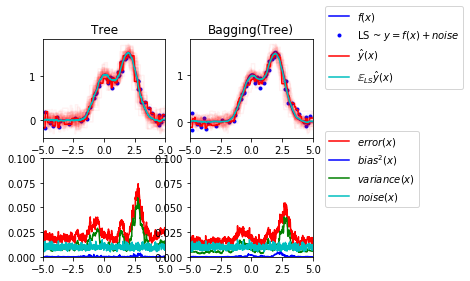

In [21]:
for n, (name, estimator) in enumerate(estimators):
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    '''
        >>> np.var([[1,2,3],[4,5,6]], axis=1)
        array([0.66666667, 0.66666667])

    '''
    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(f"{name} : {np.mean(y_error) :.4f} (error) = {np.mean(y_bias):.4f} (bias^2) + {np.mean(y_var):.4f} (var) + {np.mean(y_noise):.4f}")

    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))
        
plt.subplots_adjust(right=.75)
plt.show()